In [118]:
import numpy as np
import pandas as pd

In [119]:
df = pd.read_csv('/content/placement (1).csv')

In [120]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [122]:
df.shape

(100, 4)

In [123]:
df = df.iloc[:,1:]

In [124]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


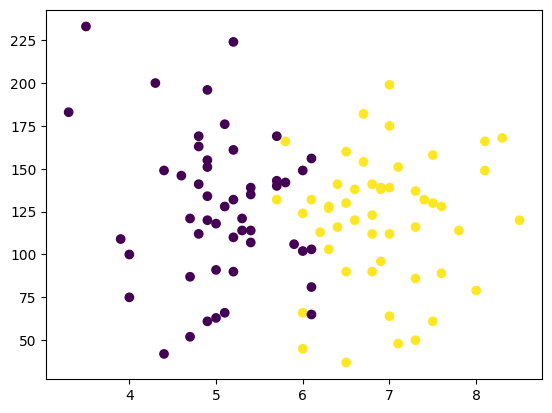

In [125]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [126]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [127]:
print(X)
print(Y)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]
0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1, random_state=42)

In [129]:
X_train

,cgpa,iq
18,4.0,100.0
30,7.6,128.0
73,4.9,61.0
33,6.0,149.0
90,7.3,86.0
...,...,...
60,6.9,139.0
71,6.1,132.0
14,6.1,103.0
92,5.2,110.0


In [130]:
Y_train

,placement
18,0
30,1
73,0
33,0
90,1
...,...
60,1
71,1
14,0
92,0


In [131]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [132]:
X_train

array([[-1.73718527, -0.62029848],
       [ 1.45537303,  0.09806189],
       [-0.9390457 , -1.62087186],
       [ 0.03645823,  0.63683217],
       [ 1.1893265 , -0.97947867],
       [-0.14090612,  0.45724208],
       [-0.9390457 ,  0.79076654],
       [ 1.1893265 , -1.90308486],
       [-0.49563482,  0.3802749 ],
       [-1.82586745, -0.38939693],
       [ 1.63273738, -0.26111829],
       [-1.38245657,  0.63683217],
       [ 0.92327998,  1.91961855],
       [ 1.45537303, -0.90251149],
       [ 2.2535126 , -0.10718393],
       [-0.76168135,  1.32953682],
       [-0.9390457 ,  0.25199626],
       [-1.38245657, -2.10833068],
       [-0.76168135, -1.49259322],
       [ 1.1893265 , -0.20980684],
       [ 0.8345978 ,  0.35461917],
       [-0.67299917,  0.9447009 ],
       [-0.14090612,  1.07297954],
       [-0.67299917, -0.87685576],
       [ 0.74591563, -0.31242975],
       [ 1.01196215, -1.95439632],
       [ 0.8345978 , -0.72292139],
       [ 1.8987839 ,  1.07297954],
       [ 0.74591563,

In [133]:
X_test = sc.transform(X_test)

In [134]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [135]:
model.fit(X_train,Y_train)

LogisticRegression()

In [136]:
y_pred = model.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred))

0.8


<Axes: >

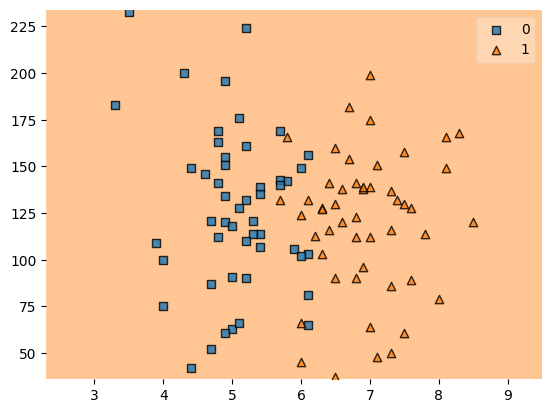

In [138]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X.values,y=Y.values,clf=model)